## Part B: Newton Method Implementation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def func(x1, x2):
    # Define the function
    ####### TODO ########
    res = 2 * x1**2 + 2 * x2**2 - 17 * x2 * np.cos(0.2 * np.pi * x1)
    res -= x1*x2
    #####################
    return res

In [13]:
def hessian(x1, x2):
    # Calculate the hessian matrix
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    res = np.zeros((2,2))
    res[0,0] = 4 + np.pi ** 2 * 3.4 * 0.2 * x2 * np.cos(0.2 * np.pi * x1)
    res[1,1] = 4
    res[1,0] = 17 * 0.2 * np.pi * np.sin(0.2 * np.pi * x1) - 1
    res[0,1] = res[1,0]
    #####################
    return res

In [14]:
# Define function inputs
def hessianInv(hessian):
    # Calculate the determinant and inverse of the hessian matrix
    ####### TODO ########
    res = np.zeros_like(hessian)
    res[0,0] = hessian[1,1]
    res[0,1] = -hessian[0,1]
    res[1,0] = -hessian[1,0]
    res[1,1] = hessian[0,0]
    denom = hessian[0,0] * hessian[1,1] - hessian[0,1] * hessian[1,0] 
    #####################
    return res / denom

In [15]:
def gradient(x1, x2):
    # Calculate the gradient vector
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    res = np.zeros((2,1))
    res[0] = 4*x1 - x2 + 17 * 0.2 * np.pi * x2 * np.sin(0.2 * np.pi * x1)
    res[1] = 4*x2 - x1 - 17 * np.cos(0.2 * np.pi * x1)
    #####################
    return res

In [16]:
def newtonMethod(x1, x2, epochs):
    for i in range(epochs):
        # Perform one step of the newton method
        # Use previous functions to implement this part
        # Update values of x1 and x2
        ####### TODO ########
        hessian_inv = hessianInv(hessian(x1,x2))
        grad = gradient(x1,x2) 

        update_rule = hessian_inv @ grad

        x1 = x1 - update_rule[0]
        x2 = x2 - update_rule[1]

        #####################
    return x1, x2

Now we shall go on to finding the minimum value

In [17]:
x1 = 1
x2 = 3
epochs = 100
x1, x2 = newtonMethod(x1, x2, epochs)
minVal = func(x1, x2)
print(f"x1 is: {x1} and x2 is: {x2} (after {epochs} epochs)")
print(f"The Minimum Value for the function is: {minVal} (after {epochs} epochs)")

x1 is: [0.13087466] and x2 is: [4.26835765] (after 100 epochs)
The Minimum Value for the function is: [-36.40349774] (after 100 epochs)


* desired output is (approximately):
* x1 is: 0.13 and x2 is: 4.27 (after 100 epochs)
* The Minimum Value for the function is: -36.40 (after 100 epochs)

Now we go on to plot the wanted shape

In [18]:
####### TODO #########
stepSize = 0.5
range_x1 = np.arange(-5, 5, step=stepSize)
range_x2 = np.arange(0, 10, step=stepSize)

In [19]:
points = []
# We want to classify the points into three categories:
# Close = -1, Far = 0, Further = 1
categories = []
for x1 in range_x1:
    for x2 in range_x2:
        # Use Newton method and find the distance as stated in the question
        ######## TODO ##########
        x1_new , x2_new = newtonMethod(x1,x2, 50)
        distance = np.abs(func(x1_new, x2_new) + 36.4)
        ########################
        if distance < 15:
            categories.append(-1)
        elif distance < 150:
            categories.append(0)
        else:
            categories.append(1)
        points.append([x1, x2])

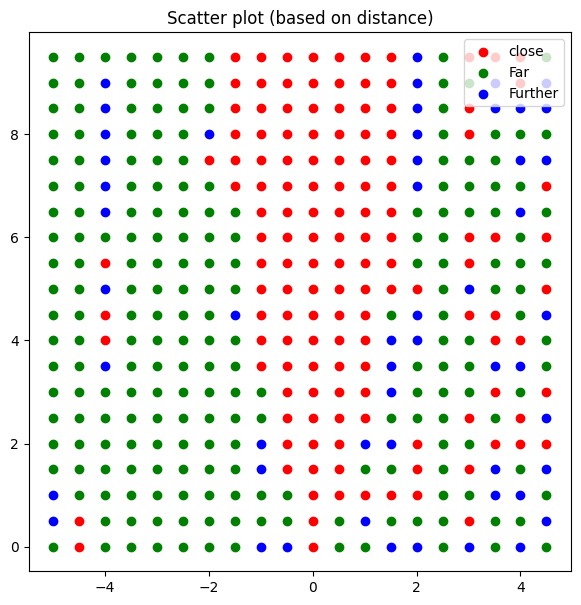

In [20]:
plt.figure(figsize=(7,7))
plt.title('Scatter plot (based on distance)')
########## TODO ###########
# Complete the figure using plt.scatter
###########################

label = {
    -1 : 'close',
    0 : 'Far',
    1 : 'Further'
}

colors = {
    -1 : 'red',
    0 : 'Green',
    1 : 'Blue'
}
categories = np.array(categories)
points = np.array(points)
for g in np.unique(categories):
    cur_class = points[categories == g]
    plt.scatter(cur_class[:,0], cur_class[:,1], c = colors[g],label = label[g])

plt.legend()
plt.show()